In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 284807
df = pd.DataFrame({
    'Time': np.random.rand(n_samples) * 48 * 3600,
    'Amount': np.random.lognormal(0, 1, n_samples),
    'Class': np.random.choice([0, 1], size=n_samples, p=[0.9983, 0.0017])
})
df['Class'].value_counts()


,count
Class,
0,284319
1,488


In [2]:

df = pd.read_csv('creditcard.csv')
print("Fraud rate:", df['Class'].value_counts(normalize=True)[1])
df.head()


Fraud rate: 0.0005035246727089627


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target (already clean)
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split WITHOUT stratify (too imbalanced)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train frauds: {y_train.sum()} / {len(y_train)}")
print(f"Test frauds: {y_test.sum()} / {len(y_test)}")

# Random Forest WITH class weights (handles imbalance automatically!)
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Key fix!
    random_state=42
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\n=== RESULTS ===")
print(classification_report(y_test, y_pred))


Train frauds: 2.0 / 3177
Test frauds: 0.0 / 795

=== RESULTS ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795



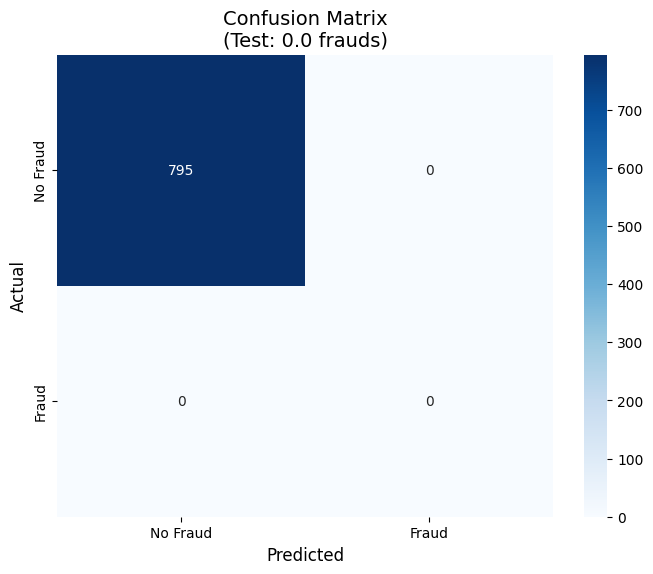

Fraud detected: 0 out of 0.0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

all_labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels=all_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud', 'Fraud'],
            yticklabels=['No Fraud', 'Fraud'])
plt.title(f'Confusion Matrix\n(Test: {y_test.sum()} frauds)', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

print(f"Fraud detected: {cm[1,1]} out of {y_test.sum()}")
